In [2]:
import pandas as pd
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D

In [3]:
from keras.datasets import cifar10

In [4]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [5]:
x_train=x_train.astype('float32')

In [6]:
import matplotlib.pyplot as plt

In [7]:
names=['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
x_test=x_test.astype('float32')
x_test.shape

(10000, 32, 32, 3)

In [9]:
x_train=x_train.reshape(x_train.shape[0],32, 32, 3)
x_test=x_test.reshape(x_test.shape[0], 32, 32, 3)

In [10]:
y_test.shape

(10000, 1)

In [11]:
y_train.shape

(50000, 1)

In [12]:
x_train/=255

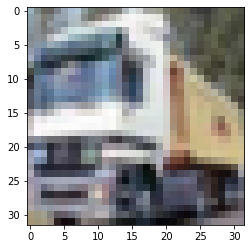

In [13]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(x_train[1])

In [14]:
x_train.shape

(50000, 32, 32, 3)

In [15]:
x_test/=255

In [16]:
classsize=10
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [17]:
model_2=Sequential()

In [18]:
model_2.add(Conv2D(64,(3,3),strides=(1,1),input_shape=(32, 32, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Conv2D(128,(3,3),strides=(1,1),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Conv2D(256,(3,3),strides=(1,1),activation='relu'))
model_2.add(MaxPool2D(pool_size=(2,2)))

In [19]:
model_2.add(Flatten())

In [20]:
model_2.add(Dense(32, activation='relu'))
#model_2.add(Dense(64, activation='relu'))

In [21]:
model_2.add(Dense(10, activation='softmax'))

In [22]:
model_2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [23]:
model_2.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 125s 313ms/step - loss: 1.5928 - accuracy: 0.4237 - val_loss: 1.3112 - val_accuracy: 0.5247
Epoch 2/10
391/391 [==============================] - 116s 297ms/step - loss: 1.1945 - accuracy: 0.5805 - val_loss: 1.0812 - val_accuracy: 0.6200
Epoch 3/10
391/391 [==============================] - 125s 320ms/step - loss: 1.0181 - accuracy: 0.6461 - val_loss: 1.0450 - val_accuracy: 0.6390
Epoch 4/10
391/391 [==============================] - 117s 299ms/step - loss: 0.9068 - accuracy: 0.6862 - val_loss: 0.9091 - val_accuracy: 0.6875
Epoch 5/10
391/391 [==============================] - 114s 291ms/step - loss: 0.8225 - accuracy: 0.7166 - val_loss: 0.8802 - val_accuracy: 0.6997
Epoch 6/10
391/391 [==============================] - 110s 282ms/step - loss: 0.7540 - accuracy: 0.7401 - val_loss: 0.8544 - val_accuracy: 0.7109
Epoch 7/10
391/391 [==============================] - 116s 296ms/step - loss: 0.6838 - accuracy: 0.7653 - val_loss: 0.8103 -

In [24]:
pred=model_2.predict(x_test[:2])

1/1 [==============================] - 1s 567ms/step


ship


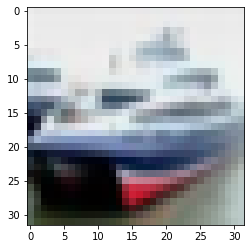

In [26]:
plt.imshow(x_test[1])
s=np.argmax(pred[1])
print(names[s])

In [ ]:
db2=(-1)*sigd(z3)*w3.T*sigd(z2)*1
    dw1=(-1)*sigd(z3)*w3.T*sigd(z2)*w2*sigd(z1)*xtrain